In [4]:
import numpy as np
import pandas as pd

# Import necessary libraries
from collections import Counter
import matplotlib.pyplot as plt
import itertools


In [3]:
distr_table = pd.DataFrame({
    'X': [0, 0, 1, 1],
    'Y': [1, 2, 1, 2],
    'pr': [0.3, 0.25, 0.15, 0.3]
})


In [4]:
distr_table

,X,Y,pr
0,0,1,0.30
1,0,2,0.25
2,1,1,0.15
3,1,2,0.30


In [9]:
for x in distr_table[["X"]].values:
    print(x)

[0]
[0]
[1]
[1]


In [7]:
 distr_table[["X"]]

,X
0,0
1,0
2,1
3,1


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
np.random.seed(0) #set a random seed for reproducibility

In [3]:
data = pd.read_csv('./data/non_normal_dataset.csv', squeeze=True)
print(len(data)) # 10000

10000


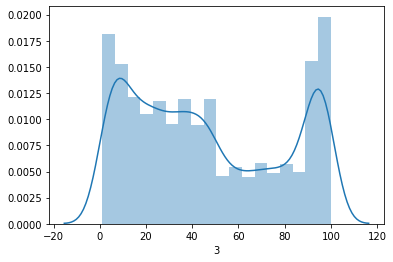

In [4]:
sns.distplot(data)

In [5]:
st.normaltest(data)

NormaltestResult(statistic=43432.811126532004, pvalue=0.0)

In [6]:
def get_sample(data, n):
    sample = []
    while len(sample) != n:
        x = np.random.choice(data)
        sample.append(x)
    
    return sample

test_sample = get_sample(data, 30)
print(test_sample[:5]) 

[56, 12, 73, 24, 8]


In [7]:
def get_sample_mean(sample):
    return sum(sample) / len(sample)

test_sample2 = get_sample(data, 30)
test_sample2_mean = get_sample_mean(test_sample2)
print(test_sample2_mean)

45.3


In [8]:
def create_sample_distribution(data, dist_size=100, n=30):
    sample_dist = []
    while len(sample_dist) != dist_size:
        sample = get_sample(data, n)
        sample_mean = get_sample_mean(sample)
        sample_dist.append(sample_mean)
    
    return sample_dist

test_sample_dist = create_sample_distribution(data)
print(test_sample_dist[:5]) 

[48.86666666666667, 39.43333333333333, 49.7, 54.53333333333333, 60.666666666666664]


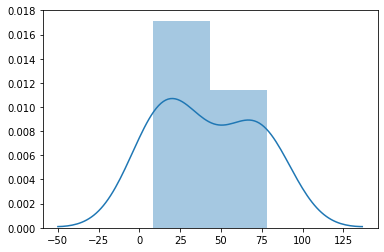

In [9]:
sample_dist_10 = create_sample_distribution(data, 10, 3)
sns.distplot(sample_dist_10);


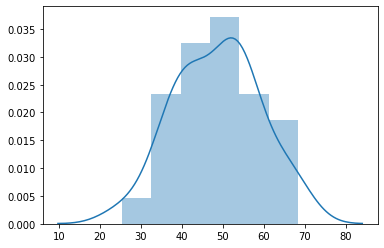

In [10]:
sample_dist_30 = create_sample_distribution(data, 30, 10)
sns.distplot(sample_dist_30)

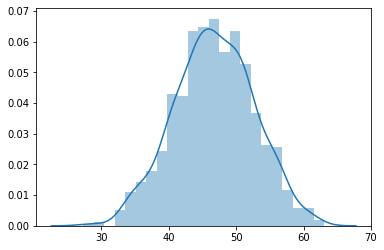

In [11]:
sample_dist_1000 = create_sample_distribution(data, 1000, 30)
sns.distplot(sample_dist_1000)

Create two lists, one with pumpkin names and one with the respective pumpkin weights. Combine the lists to create a pumpkin directory with the pumpkin names as keys and the pumpkin weights as values.

In [1]:
# Create two lists with pumpkin names and weights

pumpkin = ['A', 'B', 'C', 'D', 'E', 'F']
weights = [19, 14, 15, 9, 10, 17]

# Combine both lists to create a dictionary

pumpkin_dict = {}
for i in range(len(pumpkin)):
    pumpkin_dict[pumpkin[i]] = weights[i]

print (pumpkin_dict)

{'A': 19, 'B': 14, 'C': 15, 'D': 9, 'E': 10, 'F': 17}


In [2]:
# Calculate the population mean from pumpkin_dict

def calculate_mu(x):

    # USe the formula for mu given above
    d = float(sum(x.values())) / len(x)    

    return (d)   

mu = calculate_mu(pumpkin_dict)
mu

14.0

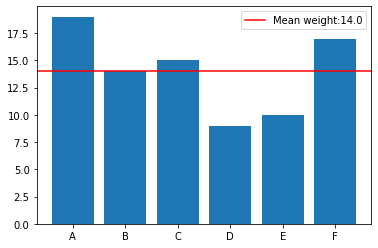

In [5]:
plt.bar(range(len(pumpkin_dict)), pumpkin_dict.values(), align='center')
plt.xticks(range(len(pumpkin_dict)), list(pumpkin_dict.keys()))
plt.axhline(y=mu, color='r', linestyle='-', 
            label = "Mean weight:" + str(mu))
plt.legend()
plt.show()

In [6]:
# Identify a sample size n 
n = 2 

# Use itertools.combinations() to generate a list of combinations
combs = list(itertools.combinations(pumpkin_dict, n))

print ("Using", n, "samples, we can see", len(combs), "possible combinations as below:")
print (combs)


Using 2 samples, we can see 15 possible combinations as below:
[('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'), ('A', 'F'), ('B', 'C'), ('B', 'D'), ('B', 'E'), ('B', 'F'), ('C', 'D'), ('C', 'E'), ('C', 'F'), ('D', 'E'), ('D', 'F'), ('E', 'F')]


In [7]:
def sample_means(sample_size, data):

    """
    This function takes in population data as a dictionary along with a chosen sample size 
    to generate all possible combinations of given sample size. 
    The function calculates the mean of each sample and returns:
    a) a list of all combinations ( as tuples ) 
    b) a list of means for all sample
    """

    n = sample_size

    # Calculate the mean of population
    mu = calculate_mu(data)
    #print ("Mean of population is:", mu)

    # Generate all possible combinations using given sample size

    combs = list(itertools.combinations(data, n))
    print ("Using", n, "samples with a population of size, we can see", len(combs), "possible combinations ")
    
    # Calculate the mean weight (x_bar) for all the combinations (samples) using the given data
    x_bar_list = []

    # Calculate sample mean for all combinations
    for i in range(len(combs)):
        sum = 0

        for j in range(n):
            key = combs[i][j]
            val =data[str(combs[i][j])]
            sum += val

        x_bar = sum/n
        x_bar_list.append(x_bar)
    print ("The mean of all sample means mu_x_hat is:", np.mean(x_bar_list))

    return combs, x_bar_list

n = 2 #Sample size

combs, means = sample_means(n, pumpkin_dict)

# Print the sample combinations with their means
for c in range(len(combs)):
    print (c+1, combs[c], means[c])


Using 2 samples with a population of size, we can see 15 possible combinations 
The mean of all sample means mu_x_hat is: 14.0
1 ('A', 'B') 16.5
2 ('A', 'C') 17.0
3 ('A', 'D') 14.0
4 ('A', 'E') 14.5
5 ('A', 'F') 18.0
6 ('B', 'C') 14.5
7 ('B', 'D') 11.5
8 ('B', 'E') 12.0
9 ('B', 'F') 15.5
10 ('C', 'D') 12.0
11 ('C', 'E') 12.5
12 ('C', 'F') 16.0
13 ('D', 'E') 9.5
14 ('D', 'F') 13.0
15 ('E', 'F') 13.5


In [9]:
def calculate_probability(means):
    '''
    Input: a list of means (x_hats)
    Output: a list of probablitity of each mean value
    '''
    #Calculate the frequency of each mean value
    freq = Counter(means)

    prob = []
    # Calculate and append fequency of each mean value in the prob list. 
    for element in means:
        for key in freq.keys():
            if element == key:
                prob.append(str(freq[key])+"/"+str(len(means)))
    return prob
    
probs = calculate_probability(means)

# Print combinations with sample means and probability of each mean value
for c in range(len(combs)):
    print (c+1, combs[c], means[c], probs[c])

1 ('A', 'B', 'C', 'D', 'E') 13.4 1/6
2 ('A', 'B', 'C', 'D', 'F') 14.8 1/6
3 ('A', 'B', 'C', 'E', 'F') 15.0 1/6
4 ('A', 'B', 'D', 'E', 'F') 13.8 1/6
5 ('A', 'C', 'D', 'E', 'F') 14.0 1/6
6 ('B', 'C', 'D', 'E', 'F') 13.0 1/6


In [10]:
n = 5

# Use above functions to generate combinations as samples with means and calculate the probability of seeing
# each mean value  with sample size = 5.

combs, means = sample_means(n, pumpkin_dict)
probs = calculate_probability(means)
for c in range(len(combs)):
    print (c+1, combs[c], means[c], probs[c])

Using 5 samples with a population of size, we can see 6 possible combinations 
The mean of all sample means mu_x_hat is: 14.0
1 ('A', 'B', 'C', 'D', 'E') 13.4 1/6
2 ('A', 'B', 'C', 'D', 'F') 14.8 1/6
3 ('A', 'B', 'C', 'E', 'F') 15.0 1/6
4 ('A', 'B', 'D', 'E', 'F') 13.8 1/6
5 ('A', 'C', 'D', 'E', 'F') 14.0 1/6
6 ('B', 'C', 'D', 'E', 'F') 13.0 1/6


In [11]:
n = 5

# Use above functions to generate combinations as samples with means and calculate the probability of seeing
# each mean value  with sample size = 5.

combs, means = sample_means(n, pumpkin_dict)
probs = calculate_probability(means)
for c in range(len(combs)):
    print (c+1, combs[c], means[c], probs[c])

Using 5 samples with a population of size, we can see 6 possible combinations 
The mean of all sample means mu_x_hat is: 14.0
1 ('A', 'B', 'C', 'D', 'E') 13.4 1/6
2 ('A', 'B', 'C', 'D', 'F') 14.8 1/6
3 ('A', 'B', 'C', 'E', 'F') 15.0 1/6
4 ('A', 'B', 'D', 'E', 'F') 13.8 1/6
5 ('A', 'C', 'D', 'E', 'F') 14.0 1/6
6 ('B', 'C', 'D', 'E', 'F') 13.0 1/6


Using 1 samples with a population of size, we can see 6 possible combinations 
The mean of all sample means mu_x_hat is: 14.0
Using 2 samples with a population of size, we can see 15 possible combinations 
The mean of all sample means mu_x_hat is: 14.0
Using 3 samples with a population of size, we can see 20 possible combinations 
The mean of all sample means mu_x_hat is: 14.0
Using 4 samples with a population of size, we can see 15 possible combinations 
The mean of all sample means mu_x_hat is: 14.0
Using 5 samples with a population of size, we can see 6 possible combinations 
The mean of all sample means mu_x_hat is: 14.0


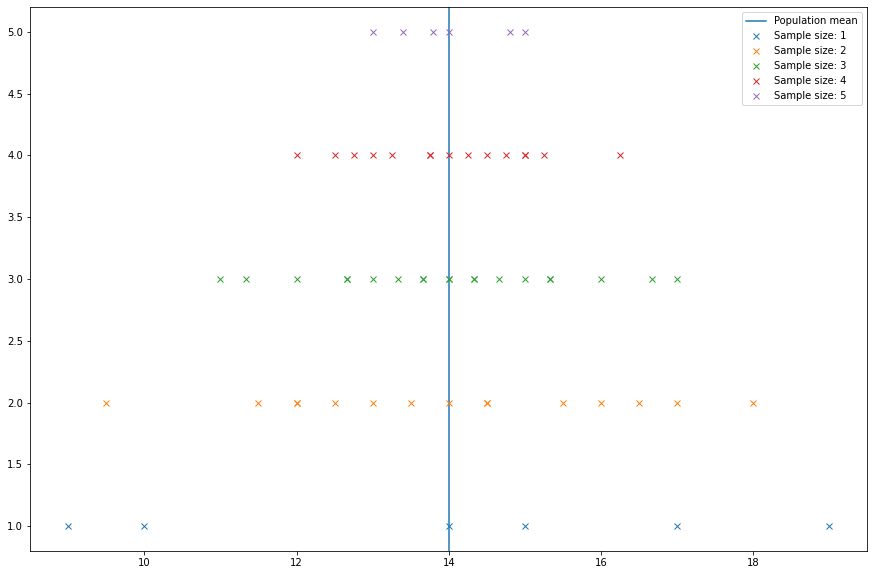

In [12]:
plt.figure(figsize=(15,10))

plt.axvline(x=mu, label = "Population mean")

# Run a for loop to execute above code for sample size 1 to 5 and visualise the spread of sample 
# means
for n in (1,2,3,4,5):
    combs, means = sample_means(n, pumpkin_dict)
    probs = calculate_probability(means)
    val = n # this is the value where you want the data to appear on the y-axis.
    ar = np.arange(10) # just as an example array
    plt.plot(means, np.zeros_like(means) + val, 'x', label =("Sample size: "+ str(n)))
    plt.legend()


plt.show()

Using 1 samples with a population of size, we can see 6 possible combinations 
The mean of all sample means mu_x_hat is: 14.0
Using 2 samples with a population of size, we can see 15 possible combinations 
The mean of all sample means mu_x_hat is: 14.0
Using 3 samples with a population of size, we can see 20 possible combinations 
The mean of all sample means mu_x_hat is: 14.0
Using 4 samples with a population of size, we can see 15 possible combinations 
The mean of all sample means mu_x_hat is: 14.0
Using 5 samples with a population of size, we can see 6 possible combinations 
The mean of all sample means mu_x_hat is: 14.0


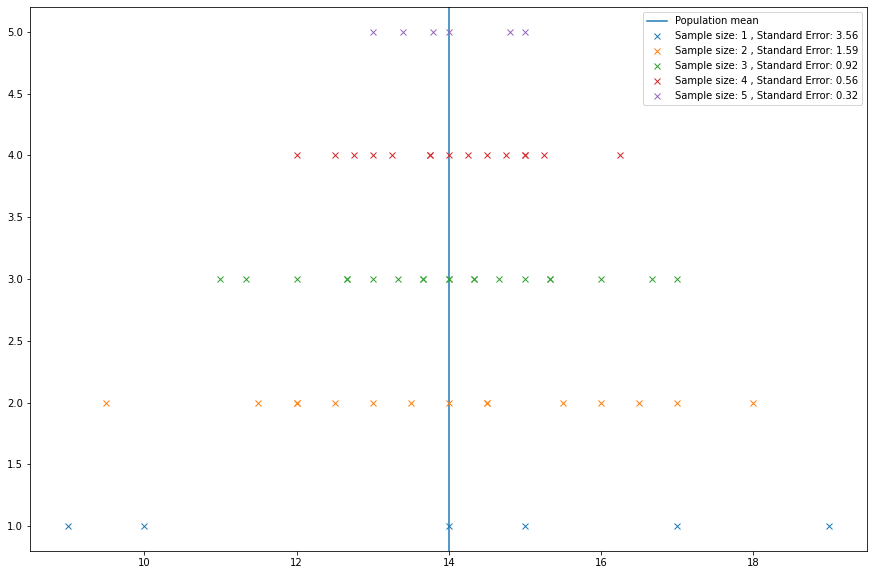

In [13]:
plt.figure(figsize=(15,10))
plt.axvline(x=mu, label = "Population mean")

# Create empty lists for storing sample means, combinations and standard error for each iteration
means_list = []
combs_list = []
err_list = []
for n in (1, 2,3,4,5):
    # Calculate combinations, means and probabilities as earlier
    
    combs, means = sample_means(n, pumpkin_dict)

    combs_list.append(combs)
    means_list.append(means)

    # Calculate the standard error by dividing sample means with square root of sample size
    err = round(np.std(means)/np.sqrt(n), 2)
    err_list.append(err)

    val = n # this is the value where you want the data to appear on the y-axis.
    ar = np.arange(10) # just as an example array
    plt.plot(means, np.zeros_like(means) + val, 'x', label ="Sample size: "+ str(n) + " , Standard Error: "+ str(err) )
    plt.legend()
plt.show()


In [16]:
# Import necessary libraries
import scipy as sp
import scipy.stats as stats
import seaborn as sns
import math

In [14]:
# Plot styles
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [17]:
np.random.seed(15)
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

In [18]:
# Convert the population into a pandas dataframe pop_ages
pop_ages = pd.DataFrame(population_ages, columns=['Age'])

# Calculate and print descriptive statistics for pop_ages

print (pop_ages.describe())

                 Age
count  250000.000000
mean       42.985332
std        13.211628
min        18.000000
25%        29.000000
50%        47.000000
75%        54.000000
max        84.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa653ad3650>]],
      dtype=object)

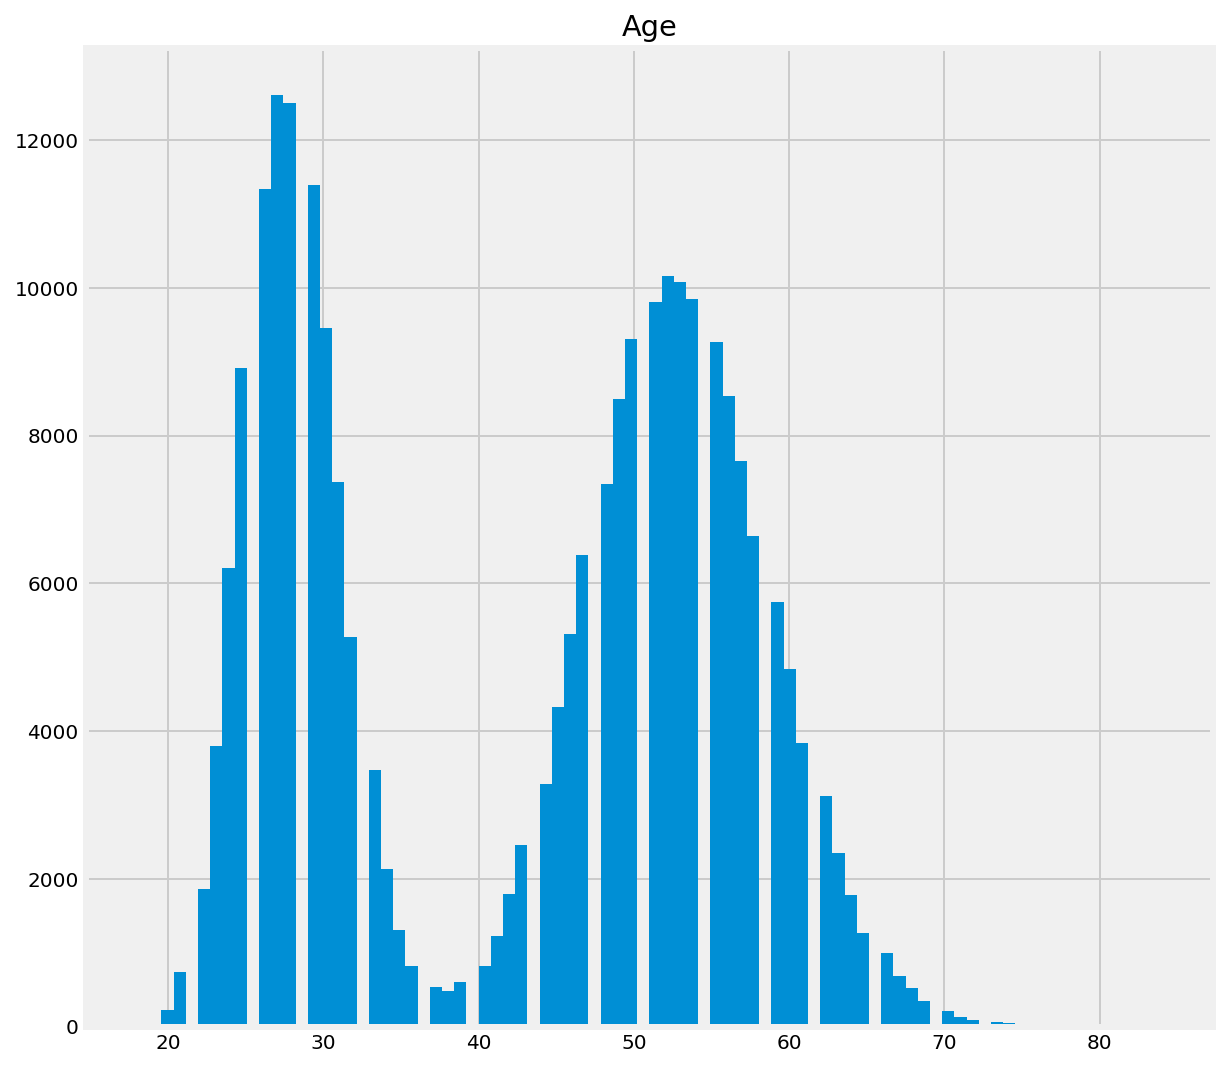

In [19]:
# Draw a histogram for pop ages
pd.DataFrame(pop_ages).hist(bins='auto',figsize=(9,9))

In [20]:
np.random.seed(15)

# Take random sample of size 500
sample_size = 500
sample = np.random.choice(a= population_ages,
                               size=500)

# Calculate sample mean and standard deviation
sample_mean = sample.mean()
sample_std = sample.std()

print ("Sample mean:", sample_mean)
print ("Sample std.:", sample_std)

print ("Difference between means:", population_ages.mean() - sample_mean)

Sample mean: 43.49
Sample std.: 12.98529552994463
Difference between means: -0.5046680000000023


In [21]:
np.random.seed(15)

point_estimates = []         # Make empty list to hold point estimates

# Take 100 samples and generate 100 point estimates using a for loop. 
# append sample means to get point estimates

for x in range(100):
    sample = np.random.choice(a= population_ages, size=500) #Take 100 samples of 500 people
    point_estimates.append(sample.mean()) #Calculate the sample mean


# Convert the point_estimates into a pandas dataframe
# Calculate and print descriptive statistics for the dataframe

pd.DataFrame(point_estimates).describe()

,0
count,100.000000
mean,42.959380
std,0.586404
min,41.296000
25%,42.530000
50%,42.960000
75%,43.356000
max,44.492000


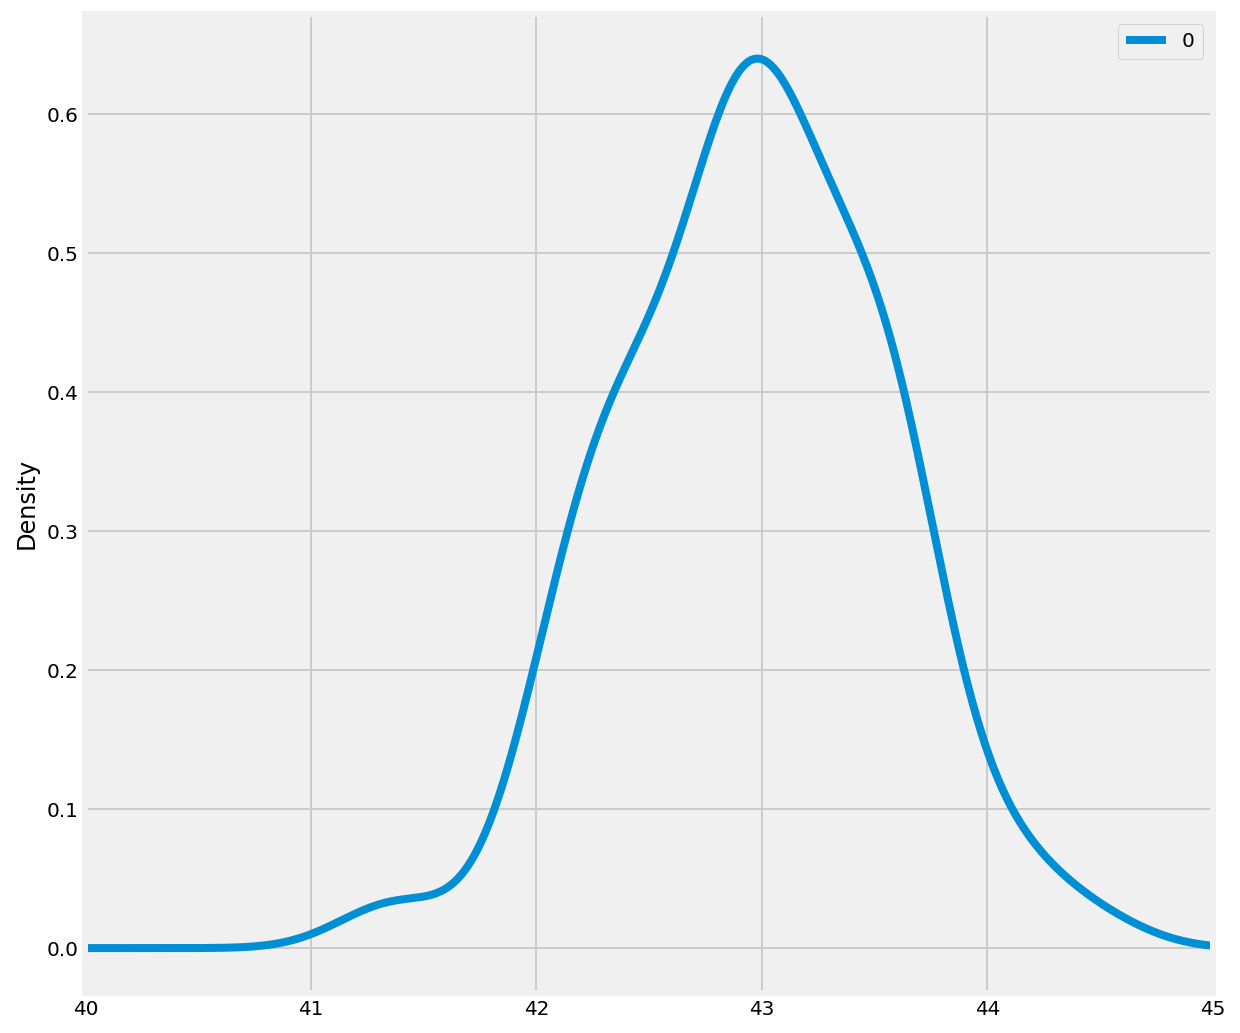

In [22]:
#Visualize the point estimates by plotting a density plot (use pandas)
pd.DataFrame(point_estimates).plot(kind="density",  # Plot sample mean density
                                   figsize=(9,9),
                                   xlim=(40,45))   

In [23]:
def conf_interval(pop, sample):
    '''
    Function input: population , sample 
    Function output: z-critical, Margin of error, Confidence interval
    '''
    sample_size = 500
    n = len(sample)
    x_hat = sample.mean()

    # Calculate the z-critical value using stats.norm.ppf()
    # Note that we use stats.norm.ppf(q = 0.975) to get the desired z-critical value 
    # instead of q = 0.95 because the distribution has two tails.
    z = stats.norm.ppf(q = 0.975)  #  z-critical value for 95% confidence

    #Calculate the population std from data
    pop_stdev = pop.std()

    # Calculate the margin of error using formula given above
    moe = z * (pop_stdev/math.sqrt(sample_size))

    # Calculate the confidence interval by applying margin of error to sample mean 
    # (mean - margin of error, mean+ margin of error)
    conf = (x_hat - moe, x_hat + moe)
    
    return z, moe, conf

# Call above function with sample and population 
z_critical, margin_of_error, confidence_interval = conf_interval(population_ages, sample)    
    
    

print("Z-critical value:")              
print(z_critical)         
print ('\nMargin of error')
print(margin_of_error)
print("\nConfidence interval:")
print(confidence_interval)

Z-critical value:
1.959963984540054

Margin of error
1.158026699800684

Confidence interval:
(41.86997330019931, 44.186026699800685)


In [24]:
np.random.seed(12)

# Select the sample size 
sample_size = 1000

# Initialize lists to store interval and mean values
intervals = []
sample_means = []

# Run a for loop for sampling 25 times and calculate + store confidence interval and sample mean values

for sample in range(25):
    # Take a random sample of chosen size 
    sample = np.random.choice(a= population_ages, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*        
    
    # Calculate z_critical, margin_of_error, confidence_interval from function above
    # z_critical, margin_of_error, confidence_interval = conf_interval(population_ages, sample)    

    pop_stdev = population_ages.std()  # Get the population standard deviation

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)

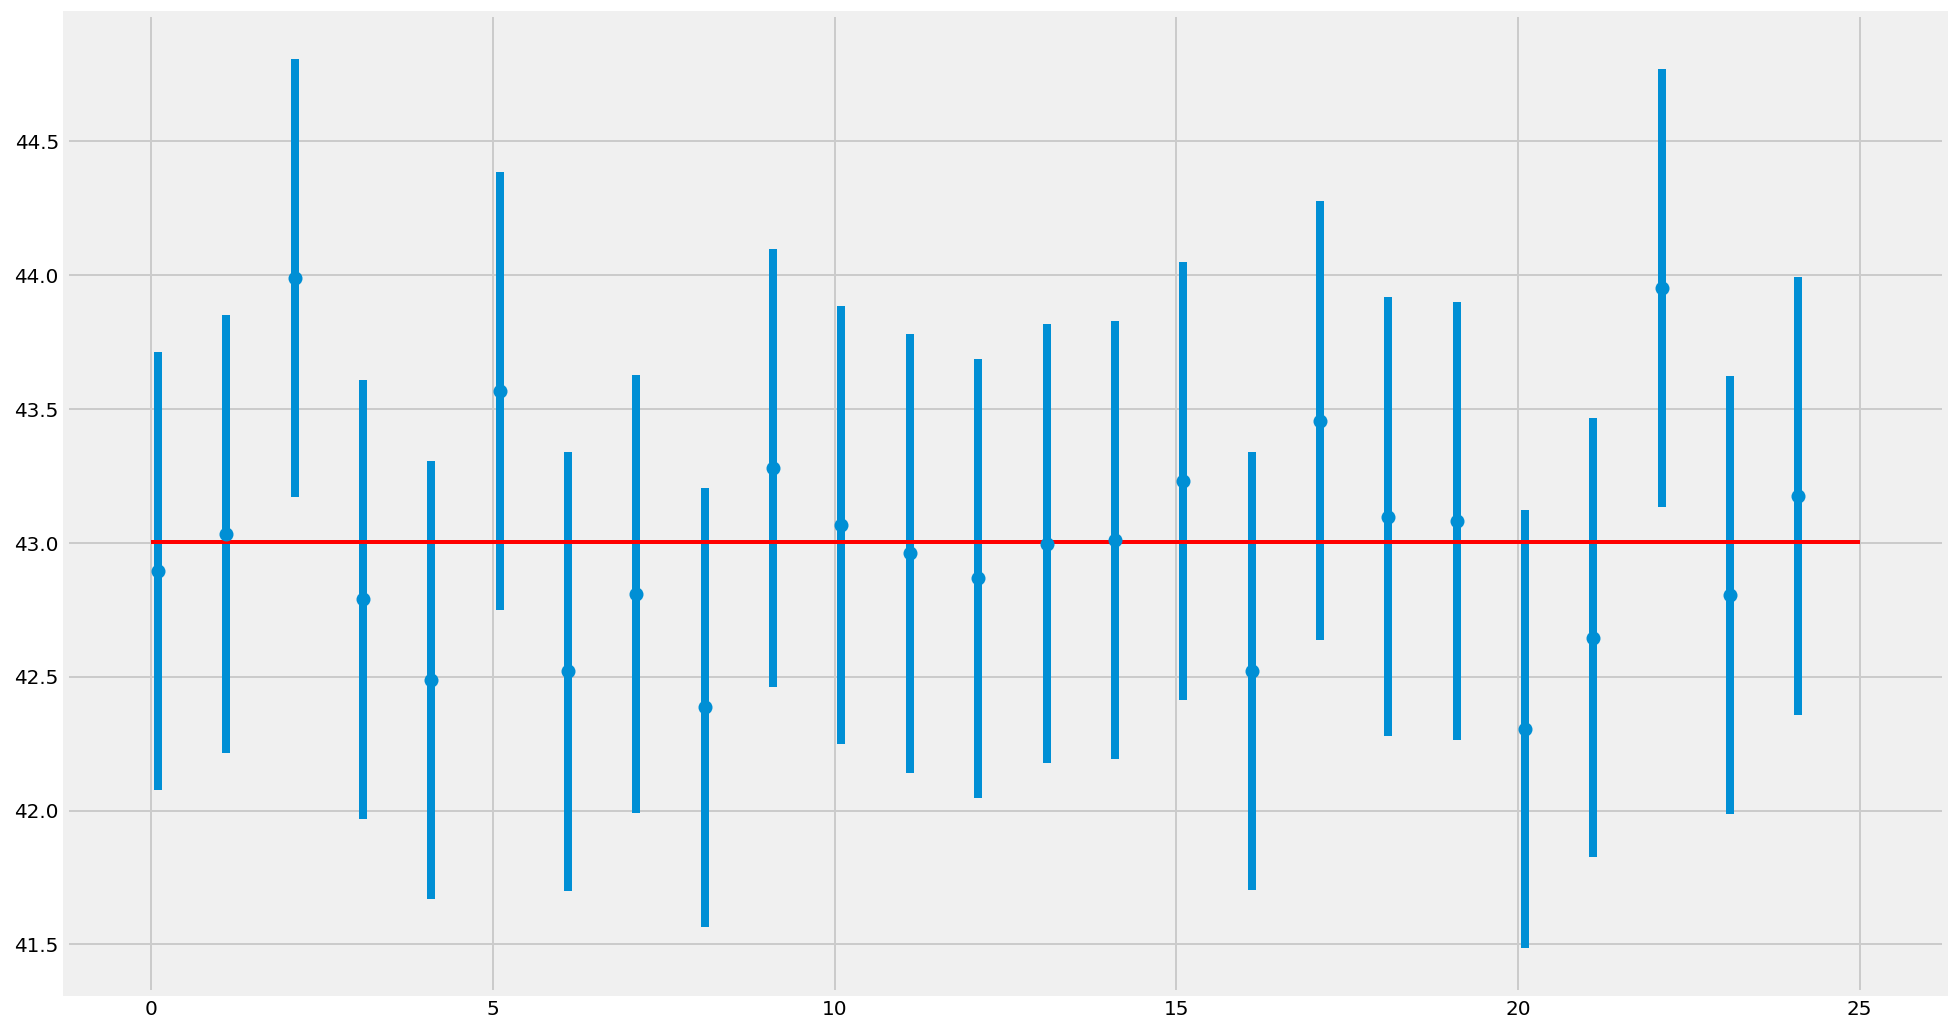

In [25]:
plt.figure(figsize=(15,9))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=43.0023, 
           linewidth=2.0,
           color="red")